# Import Corpus

In [134]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
treebank_tokenizer = TreebankWordTokenizer()
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import os
os.chdir('C:\\Users\\junch\\Desktop\\NLP\\Corpus')
ps = PorterStemmer()
stopwords_english = set(stopwords.words('english'))

In [135]:
# Load news articles from three Chinese newspaper.
china_daily=pd.read_csv('China Daily.csv')
people_daily=pd.read_csv('People\'s Daily.csv')
xinhua_agent=pd.read_csv('Xinhua Agent.csv')

In [136]:
Chinese_newspaper=pd.concat([china_daily,people_daily,xinhua_agent],axis=0,ignore_index=True)

In [137]:
# Load news articles from three U.S. newspaper.
Wall_Street_Journal = pd.read_csv('Wall Street Journal.csv')
Washington_post = pd.read_csv('Washington Post.csv')
New_York_Times = pd.read_csv('New York Times.csv')

In [138]:
US_newspaper=pd.concat([Wall_Street_Journal,New_York_Times,Washington_post],axis=0,ignore_index=True)

In [139]:
#Drop missing values
CN=Chinese_newspaper.dropna()
US=US_newspaper.dropna()


In [140]:
print(CN.shape)
print(US.shape)


(549, 2)
(552, 2)


In [141]:
# Split into title and text.
CN_title=CN.iloc[:,0]
CN_text=CN.iloc[:,1]
US_title=US.iloc[:,0]
US_text=US.iloc[:,1]

# Generate WordCloud for Title

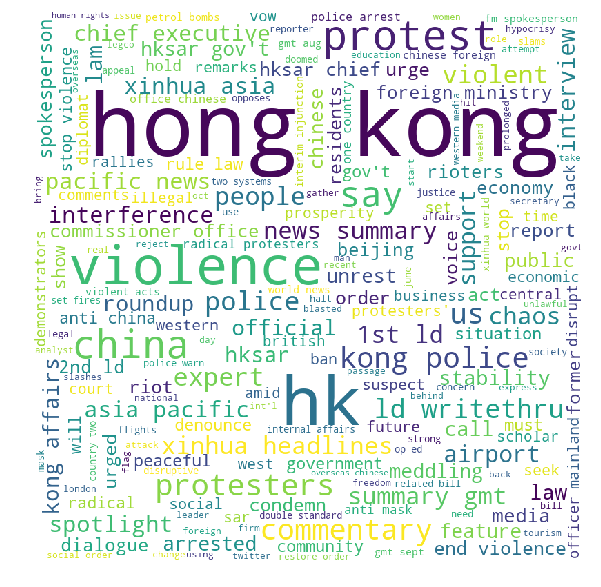

In [142]:
# WorldCloud for chinese newspaper
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for title in CN_title[:]: 
      
    # typecaste each val to string 
    title = str(title) 
  
    # split the value 
    tokens = title.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

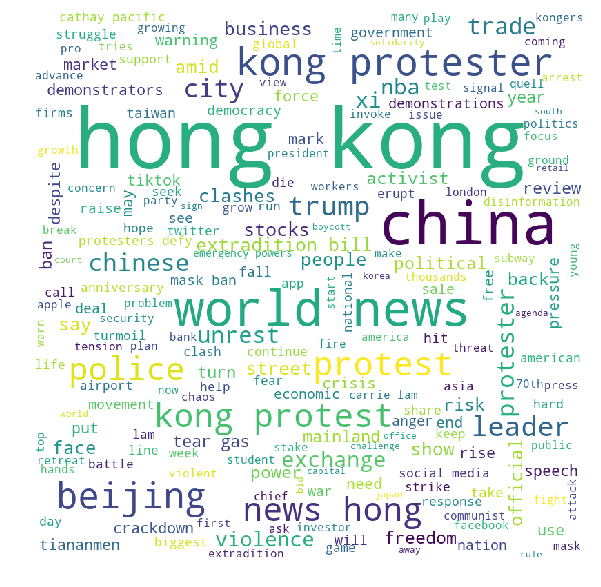

In [143]:
# WorldCloud for U.S. newspaper
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for title in US_title[:]: 
      
    # typecaste each val to string 
    title = str(title) 
  
    # split the value 
    tokens = title.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Word Frequency and TF-IDF

In [144]:
CN_tokens={}
US_tokens={}

In [145]:
# Word Frequency data preprocessing
# Tokenization and Stemming
# Create dictionaries with word frequency as value
for news in CN_text[:]:
    content = nltk.word_tokenize(news)
    for word in content:
        if word.isalpha() and word not in stopwords_english:
            stemmed = ps.stem(word)
            if stemmed in CN_tokens.keys():
                CN_tokens[stemmed] += 1
            else:
                CN_tokens[stemmed] = 1
        
for news in US_text[:]:
    content = nltk.word_tokenize(news)
    for word in content:
        if word.isalpha() and word not in stopwords_english:
            stemmed = ps.stem(word)  
            if stemmed in US_tokens.keys():
                US_tokens[stemmed] += 1
            else:
                US_tokens[stemmed] = 1

In [146]:
pd_cn_tokens=pd.DataFrame(list(CN_tokens.items()), columns=['CN_word', 'CN_freq'])
pd_cn_tokens=pd_cn_tokens.sort_values(by="CN_freq" , ascending=False).reset_index(drop=True)[:40]
pd_us_tokens=pd.DataFrame(list(US_tokens.items()), columns=['US_word', 'US_freq'])
pd_us_tokens=pd_us_tokens.sort_values(by="US_freq" , ascending=False).reset_index(drop=True)[:40]
word_freq=pd.concat([pd_cn_tokens,pd_us_tokens],axis=1,ignore_index=True)

In [147]:
word_freq.columns=['CN_word', 'CN_freq','US_word', 'US_freq']
word_freq

,CN_word,CN_freq,US_word,US_freq
0,hong,5721,hong,6067
1,kong,5674,kong,5825
2,said,2859,protest,4575
3,polic,2015,the,3709
4,protest,1954,said,3601
5,the,1939,china,3525
6,govern,1340,chines,2245
7,peopl,1299,polic,2171
8,china,1289,peopl,1720
9,violenc,1098,beij,1645


In [148]:
CN_unique=[]
US_unique=[]

In [149]:
# for the specific range(top 40 common words), pick words appear from one country that do not appear in the other.
for i in pd_cn_tokens['CN_word']:
    for j in pd_us_tokens['US_word']:
        t=True
        if i==j:
            t=False
            break
    if t==True:
        CN_unique.append(i)
        
for i in pd_us_tokens['US_word']:
    for j in pd_cn_tokens['CN_word']:
        t=True
        if i==j:
            t=False
            break
    if t==True:
        US_unique.append(i)
                
            


In [150]:
# Unique chinese words
CN_unique

['violenc',
 'law',
 'violent',
 'public',
 'countri',
 'hksar',
 'act',
 'radic',
 'region',
 'intern',
 'order',
 'administr',
 'affair',
 'forc',
 'nation',
 'US',
 'special',
 'right',
 'system']

In [151]:
# Unique U.S. words
US_unique

['beij',
 'would',
 'year',
 'but',
 'polit',
 'mainland',
 'time',
 'It',
 'compani',
 'state',
 'leader',
 'mani',
 'parti',
 'week',
 'offici',
 'new',
 'say',
 'trump',
 'like']

In [152]:
# TD-IDF data preprocessing
CN_text = CN_text.str.split()
CN_text = CN_text.apply(lambda x: [ps.stem(y) for y in x])
CN_text = CN_text.apply(lambda x: [' '.join(x)])
CN_text = pd.Series(CN_text).astype(str)
CN_text.head()


0    ['policeman hospit with leg burns; larg group ...
1    ['it\' a reflect of bruce lee\' transcend appe...
2    ['expert say it\' harder to lure oversea talen...
3    ['there is a dreari dismal familiar to me in w...
4    ['editor\' note: the US congress ha made the p...
Name: text, dtype: object

In [153]:
# TF-IDF fit_transform
vectorizer = CountVectorizer(stop_words='english', min_df=int(5), max_df=0.9, ngram_range=(1, 1))
tfidf_cn = vectorizer.fit_transform(CN_text)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(tfidf_cn)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term_CN': vectorizer.get_feature_names(), 'weight': weights})
weights_cn=weights_df.sort_values(by='weight', ascending=False).reset_index(drop=True)[:20]




In [154]:
vectorizer = CountVectorizer(stop_words='english', min_df=int(5), max_df=0.9, ngram_range=(1, 1))
tfidf_us = vectorizer.fit_transform(US_text)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(tfidf_us)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term_US': vectorizer.get_feature_names(), 'weight': weights})
weights_us=weights_df.sort_values(by='weight', ascending=False).reset_index(drop=True)[:20]
weights_tfidf=pd.concat([weights_cn,weights_us],axis=1,ignore_index=True)


In [155]:
weights_tfidf.columns=['CN_word', 'CN_tfidf','US_word', 'US_tfidf']
weights_tfidf

,CN_word,CN_tfidf,US_word,US_tfidf
0,said,0.087133,said,0.075097
1,polic,0.063606,police,0.064404
2,china,0.049195,protesters,0.057372
3,govern,0.040110,chinese,0.050596
4,law,0.040074,mr,0.046603
5,ha,0.039674,beijing,0.046157
6,violent,0.035292,people,0.039267
7,wa,0.032080,government,0.037620
8,violenc,0.031111,city,0.035355
9,peopl,0.031015,lam,0.032596


In [156]:
CN_unique_tfidf=[]
US_unique_tfidf=[]

In [157]:
# for the specific range(top 40 common words), pick words appear from one country that do not appear in the other.
for i in weights_tfidf.iloc[:,0]:
    for j in weights_tfidf.iloc[:,2]:
        t=True
        if i==j:
            t=False
            break
    if t==True:
        CN_unique_tfidf.append(i)
        
for i in weights_tfidf.iloc[:,2]:
    for j in weights_tfidf.iloc[:,0]:
        t=True
        if i==j:
            t=False
            break
    if t==True:
        US_unique_tfidf.append(i)

In [158]:
CN_unique_tfidf

['polic',
 'china',
 'govern',
 'ha',
 'violent',
 'wa',
 'violenc',
 'peopl',
 'hksar',
 'public',
 'offic',
 'airport',
 'chines',
 'intern',
 'sar',
 'order',
 'act']

In [159]:
US_unique_tfidf

['police',
 'protesters',
 'chinese',
 'mr',
 'beijing',
 'people',
 'government',
 'city',
 'trump',
 'mainland',
 'xi',
 'party',
 'democracy',
 'trade',
 'political',
 'year',
 'pro']

# Information Extraction 

In [160]:
import en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

In [161]:
# Extracted information about person, locations and organizations
doc_cn_persons = {}
doc_cn_locations = {}
doc_cn_organs = {}
doc_us_persons = {}
doc_us_locations = {}
doc_us_organs = {}

In [162]:
for article in CN_text[:]:
    content = nlp(article)
    for word in content.ents:
        text = word.text.strip()
        if word.label_ == 'PERSON':
            if text in doc_cn_persons.keys():
                doc_cn_persons[text] += 1
            else:
                doc_cn_persons[text] = 1
        elif word.label_ == 'LOC' or word.label_ == 'GPE':
            if text in doc_cn_locations.keys():
                doc_cn_locations[text] += 1
            else:
                doc_cn_locations[text] = 1
        elif word.label_ == 'ORG':
            if text in doc_cn_organs.keys():
                doc_cn_organs[text] += 1
            else:
                doc_cn_organs[text] = 1        

            

In [163]:
for article in US_text[:]:
    content = nlp(article)
    for word in content.ents:
        text = word.text.strip()
        if word.label_ == 'PERSON':
            if text in doc_us_persons.keys():
                doc_us_persons[text] += 1
            else:
                doc_us_persons[text] = 1
        elif word.label_ == 'LOC' or word.label_ == 'GPE':
            if text in doc_us_locations.keys():
                doc_us_locations[text] += 1
            else:
                doc_us_locations[text] = 1
        elif word.label_ == 'ORG':
            if text in doc_us_organs.keys():
                doc_us_organs[text] += 1
            else:
                doc_us_organs[text] = 1  

In [164]:
CN_persons=sorted(doc_cn_persons.items(), key=lambda item:item[1],reverse=True)
CN_locations=sorted(doc_cn_locations.items(), key=lambda item:item[1],reverse=True)
CN_organs=sorted(doc_cn_organs.items(), key=lambda item:item[1],reverse=True)
US_persons=sorted(doc_us_persons.items(), key=lambda item:item[1],reverse=True)
US_locations=sorted(doc_us_locations.items(), key=lambda item:item[1],reverse=True)
US_organs=sorted(doc_us_organs.items(), key=lambda item:item[1],reverse=True)

In [165]:
CN_persons[:30]

[('Li', 37),
 ('Ho', 32),
 ('Ma', 29),
 ('Yu', 13),
 ('Wu', 13),
 ('Xu', 12),
 ('Lo', 11),
 ('Ng', 11),
 ('Lu', 9),
 ('Yi', 9),
 ('Xi', 8),
 ('yang', 7),
 ('Gu', 6),
 ('Po', 6),
 ('chang', 6),
 ('Hu', 5),
 ('Fu', 5),
 ('Al', 4),
 ("Li yang'", 3),
 ('Ko', 3),
 ('Ka', 3),
 ('Yu kwok-chun', 3),
 ('Ho chiu-king', 3),
 ('al-saouri', 3),
 ("\\'be", 2),
 ('Hu xijin', 2),
 ('K.', 2),
 ("Xi jinping\\'", 2),
 ('wang', 2),
 ('chunying\\', 2)]

In [166]:
US_persons[:30]

[('Lam', 576),
 ('Xi', 375),
 ('Trump', 279),
 ('Carrie Lam', 209),
 ('Xi Jinping', 174),
 ('Hong Kongers', 157),
 ('Crédito', 113),
 ('Facebook', 111),
 ('Morey', 107),
 ('Wong', 92),
 ('Li', 86),
 ('Mao', 83),
 ('Chan', 61),
 ('Lai', 60),
 ('Ho', 58),
 ('Natasha Khan', 54),
 ('Joshua Wong', 49),
 ('Daryl Morey', 45),
 ('Leung', 40),
 ('Yuen Long', 37),
 ('Xi’s', 37),
 ('Joyu Wang', 36),
 ('Tsai', 34),
 ('Adam Silver', 32),
 ('Silver', 31),
 ('Zhao', 31),
 ('Yang', 30),
 ('Cheng', 30),
 ('Law', 29),
 ('Zhang', 27)]

In [167]:
CN_locations[:30]

[('US', 392),
 ('china', 46),
 ('UK', 27),
 ('HK', 5),
 ("\\'hong kong", 4),
 ('california', 4),
 ('Ho', 3),
 ('Ma', 2),
 ('Xi', 2),
 ('Ng', 2),
 ('Po', 2),
 ('Ta kung', 2),
 ('Fo', 1),
 ('DC', 1),
 ('JU', 1),
 ('mid-2019', 1),
 ('stockholm', 1),
 ('media.(india', 1),
 ('Fo tan', 1)]

In [168]:
US_locations[:30]

[('Hong Kong', 4265),
 ('China', 3406),
 ('Beijing', 1722),
 ("Hong Kong's", 747),
 ('U.S.', 645),
 ('the United States', 346),
 ('Taiwan', 332),
 ('Hong Kong’s', 326),
 ('HONG KONG', 159),
 ('Washington', 138),
 ('Britain', 134),
 ('Japan', 126),
 ('Shenzhen', 104),
 ('America', 84),
 ('Twitter', 82),
 ('Asia', 80),
 ('Russia', 79),
 ('Shanghai', 76),
 ('Australia', 71),
 ('Europe', 65),
 ('New York', 62),
 ('London', 55),
 ('Iran', 51),
 ('Ukraine', 40),
 ('Tokyo', 37),
 ('Chile', 37),
 ("the People's Republic of China", 36),
 ('U.K.', 35),
 ('South Korea', 34),
 ('Canada', 34)]

In [169]:
CN_organs[:30]

[('systems\\', 48),
 ('EU', 19),
 ('UN', 16),
 ('HK', 11),
 ('commissioner\\', 9),
 ('airport\\', 6),
 ('¡', 4),
 ('ministry\\', 3),
 ('country\\', 3),
 ('china\\', 3),
 ('EP', 3),
 ('CE', 3),
 ('CC', 3),
 ("\\'I", 2),
 ('sport\\', 2),
 ('Du', 2),
 ('Xi', 2),
 ('Ma express', 2),
 ('airline\\', 2),
 ('bridge\\', 2),
 ('ecuador\\', 2),
 ('Po', 1),
 ('C.', 1),
 ("Di bar\\'", 1),
 ('ortagus\\', 1),
 ('AG', 1),
 ('NV', 1),
 ('Yi', 1),
 ('J.', 1),
 ('Li', 1)]

In [170]:
US_organs[:30]

[('Trump', 380),
 ('NBA', 248),
 ('Communist Party', 131),
 ('TikTok', 123),
 ('the Communist Party', 111),
 ('Cathay', 101),
 ('’s', 79),
 ('Rockets', 76),
 ('N.B.A.', 74),
 ('Telegram', 63),
 ('the Chinese Communist Party', 62),
 ('Congress', 60),
 ('Tiananmen', 56),
 ('Apple', 53),
 ('Times', 43),
 ('The Washington Post', 42),
 ('Cathay Pacific', 41),
 ('Legislative Council', 40),
 ('Disney', 39),
 ('the Chinese University of Hong Kong', 37),
 ('the White House', 37),
 ('Senate', 36),
 ('LSE', 35),
 ('HSBC', 34),
 ('the Legislative Council', 33),
 ('Foreign Ministry', 32),
 ('Fed', 31),
 ('the Umbrella Movement', 30),
 ('ESPN', 30),
 ('Google', 29)]